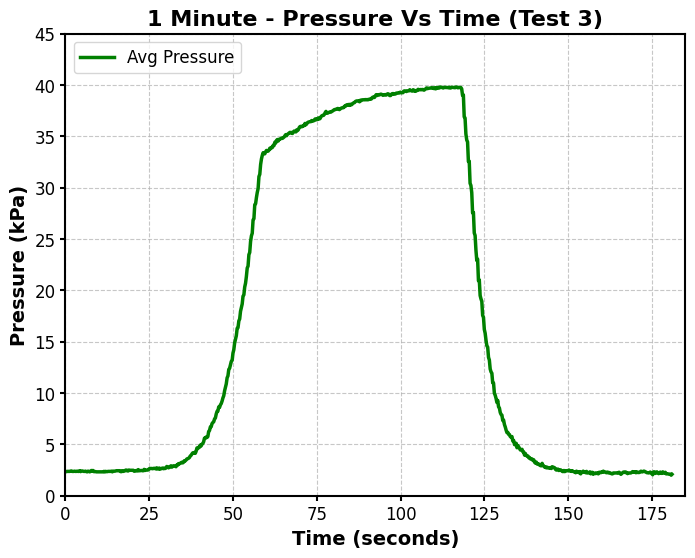

Graph saved as GraphedResults\1_Minute_-_Pressure_Vs_Time_(Test_3).png


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure the GraphedResults folder exists
output_folder = 'GraphedResults'
os.makedirs(output_folder, exist_ok=True)

# Load the TXT file with comma-separated values
txt_data = pd.read_csv('update_2024_08_30 1min old sensor test3.txt', 
                       sep=',', 
                       header=0, 
                       names=['Time', 'Pressure', 'Max'])

# Create the plot with specified figure size
plt.figure(figsize=(8, 6))

# Plot the data with custom line styles
plt.plot(txt_data['Time'], txt_data['Pressure'], label='Avg Pressure', 
         color='green', linestyle='-', linewidth=2.5)  # Solid green line for 'Pressure'

# Set axis labels with the appropriate font and style
plt.xlabel('Time (seconds)', fontsize=14, fontweight='bold')  # Bold x-axis label
plt.ylabel('Pressure (kPa)', fontsize=14, fontweight='bold')  # Bold y-axis label

# Add a title with bold text
plot_title = '1 Minute - Pressure Vs Time (Test 3)'  # Use this for the plot title and the filename
plt.title(plot_title, fontsize=16, fontweight='bold')

# Set the legend with appropriate location and font size
plt.legend(loc='upper left', fontsize=12)

# Customize the grid and axis ticks
plt.grid(True, linestyle='--', alpha=0.7)  # Dotted grid
plt.xticks(fontsize=12)  # Adjust the font size of x-axis ticks
plt.yticks(fontsize=12)  # Adjust the font size of y-axis ticks

# Set axis limits (optional, based on your data)
plt.xlim([0, 185])  # Example: setting x-axis limits
plt.ylim([0, 45])   # Example: setting y-axis limits

# Set axis line width and tick width for a bolder look
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.tick_params(width=1.5)

# Save the plot as a PNG file with the title as the filename
file_name = f"{plot_title.replace(' ', '_')}.png"  # Replace spaces with underscores
output_path = os.path.join(output_folder, file_name)
plt.savefig(output_path)

# Show the plot
plt.show()

print(f"Graph saved as {output_path}")

In [50]:
def add_percentage_column(input_file, output_file):
    with open(input_file, 'r') as file:
        lines = file.readlines()

    # Extract the first column values and find the last value
    first_column_values = [float(line.strip().split(', ')[0]) for line in lines]
    last_value = first_column_values[-1]

    modified_lines = []
    for line in lines:
        values = line.strip().split(', ')
        first_value = float(values[0])
        # Calculate percentage of time
        percentage_time = (first_value / last_value) * 100
        # Create the modified line with the new percentage column
        modified_line = '{:.4f}, {}, {:.2f}%'.format(first_value, ', '.join(values[1:]), percentage_time)
        modified_lines.append(modified_line)

    # Write the modified data to the output file
    with open(output_file, 'w') as file:
        file.write('\n'.join(modified_lines))

# Usage
input_file = 'update_2024-09-04_1hr_oldsensor_test1.txt'
output_file = 'modified_update_2024-09-04_1hr_oldsensor_test1.txt'
add_percentage_column(input_file, output_file)

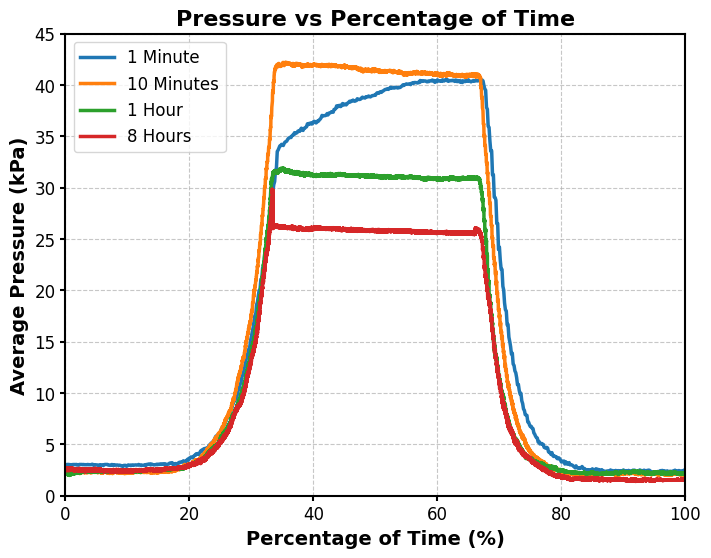

Graph saved as GraphedResults\Pressure_vs_PercentageofTime.png


In [62]:
import matplotlib.pyplot as plt
import os

# Ensure the GraphedResults folder exists
output_folder = 'GraphedResults'
os.makedirs(output_folder, exist_ok=True)

# Function to extract the test duration from the filename
def extract_duration_from_filename(filename):
    if '1min' in filename:
        return '1 Minute'
    elif '10min' in filename:
        return '10 Minutes'
    elif '1hr' in filename:
        return '1 Hour'
    elif '8hr' in filename:
        return '8 Hours'
    else:
        return 'Unknown Duration'

def plot_pressure_vs_percentage(filenames):
    plt.figure(figsize=(8, 6))  # Set the figure size
    
    # Iterate over each file and plot data
    for filename in filenames:
        percentages = []
        avg_pressures = []
        
        # Read the file
        with open(filename, 'r') as file:
            lines = file.readlines()
            for line in lines:
                data = line.strip().split(', ')
                
                # Extract percentage and average pressure (2nd column and 4th column)
                time, avg_pressure, value3, percentage = data
                avg_pressures.append(float(avg_pressure))
                percentages.append(float(percentage.strip('%')))
        
        # Extract duration from filename for the legend
        duration_label = extract_duration_from_filename(filename)
        
        # Plot data for the current file with custom line styles
        plt.plot(percentages, avg_pressures, label=duration_label, 
                 linewidth=2.5)  # Solid line with custom width

    # Set axis labels with the appropriate font and style
    plt.xlabel('Percentage of Time (%)', fontsize=14, fontweight='bold')  # Bold x-axis label
    plt.ylabel('Average Pressure (kPa)', fontsize=14, fontweight='bold')  # Bold y-axis label

    # Add a title with bold text
    plt.title('Pressure vs Percentage of Time', fontsize=16, fontweight='bold')

    # Set the legend with appropriate location and font size
    plt.legend(loc='upper left', fontsize=12)

    # Customize the grid and axis ticks
    plt.grid(True, linestyle='--', alpha=0.7)  # Dotted grid with transparency
    plt.xticks(fontsize=12)  # Adjust the font size of x-axis ticks
    plt.yticks(fontsize=12)  # Adjust the font size of y-axis ticks

    # Set axis limits (optional)
    plt.xlim([0, 100])  # Set x-axis limits from 0 to 100 (percentage)
    plt.ylim([0, 45])  # Customize based on your data

    # Set axis line width and tick width for a bolder look
    ax = plt.gca()
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.tick_params(width=1.5)

    # Save the plot as a PNG file
    file_name = 'Pressure_vs_PercentageofTime.png'
    output_path = os.path.join(output_folder, file_name)
    plt.savefig(output_path)

    # Show the plot
    plt.show()

    print(f"Graph saved as {output_path}")

# List of files
filenames = [
    'modified_update_2024_08_30 1min old sensor test1.txt',
    'modified_update_2024_08_30 10min old sensor test1.txt',
    'modified_update_2024-09-04_1hr_oldsensor_test1.txt',
    'modified_update_2024-09-06_8hr_oldsensor_test1.txt'
]

# Plot the graphs
plot_pressure_vs_percentage(filenames)

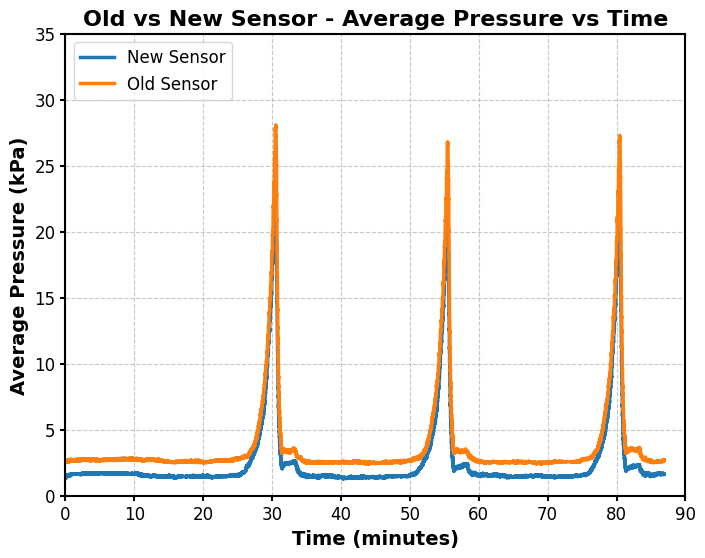

Graph saved as GraphedResults\Variable_Average_Pressure_vs_Time_New_Old_Sensors.png


In [77]:
import matplotlib.pyplot as plt
import os

# Ensure the GraphedResults folder exists
output_folder = 'GraphedResults'
os.makedirs(output_folder, exist_ok=True)

def plot_time_vs_pressure(filenames, labels):
    plt.figure(figsize=(8, 6))  # Set the figure size
    
    # Iterate over each file and plot data
    for filename, label in zip(filenames, labels):
        times = []
        avg_pressures = []
        
        # Read the file
        with open(filename, 'r') as file:
            lines = file.readlines()
            for line in lines:
                data = line.strip().split(', ')
                
                # Extract time (1st column) and average pressure (2nd column)
                time, avg_pressure, value3 = data
                times.append(float(time))
                avg_pressures.append(float(avg_pressure))
        
        # Plot data for the current file with custom line styles
        plt.plot(times, avg_pressures, label=label, 
                 linewidth=2.5)  # Solid line with custom width

    # Set axis labels with the appropriate font and style
    plt.xlabel('Time (minutes)', fontsize=14, fontweight='bold')  # Bold x-axis label
    plt.ylabel('Average Pressure (kPa)', fontsize=14, fontweight='bold')  # Bold y-axis label

    # Add a title with bold text
    plt.title('Old vs New Sensor - Average Pressure vs Time', fontsize=16, fontweight='bold')

    # Set the legend with appropriate location and font size
    plt.legend(loc='upper left', fontsize=12)

    # Customize the grid and axis ticks
    plt.grid(True, linestyle='--', alpha=0.7)  # Dotted grid with transparency
    plt.xticks(fontsize=12)  # Adjust the font size of x-axis ticks
    plt.yticks(fontsize=12)  # Adjust the font size of y-axis ticks

    # Set axis limits (optional)
    plt.xlim([0, 90])  # Set x-axis limits based on your data
    plt.ylim([0, 35])  # Customize based on your data

    # Set axis line width and tick width for a bolder look
    ax = plt.gca()
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.tick_params(width=1.5)

    # Save the plot as a PNG file
    file_name = 'Variable_Average_Pressure_vs_Time_New_Old_Sensors.png'
    output_path = os.path.join(output_folder, file_name)
    plt.savefig(output_path)

    # Show the plot
    plt.show()

    print(f"Graph saved as {output_path}")

# List of files and corresponding labels
filenames = [
    'update_2024-09-12_variable_newsensor.txt',
    'update_2024-09-12_variable_oldsensor.txt'
]
labels = ['New Sensor', 'Old Sensor']

# Plot the graphs
plot_time_vs_pressure(filenames, labels)

In [137]:
# Open the file for reading
with open('update_2024-09-06_8hr_newsensor_test1.txt', 'r') as file:
    # Read each line from the file
    lines = file.readlines()

# Open the file for writing
with open('hysetersisupdate_2024-09-06_8hr_newsensor_test1.txt', 'w') as file:
    # Iterate over each line
    for line in lines:
        
        # Strip any leading/trailing whitespace and append 0.0000 as a float to the line
        updated_line = line.strip() + ', 0.0000\n'

        # Write the updated line to the output file
        file.write(updated_line)

In [138]:
# Open the file for reading
with open('hysetersisupdate_2024-09-06_8hr_newsensor_test1.txt', 'r') as file:
    # Read each line from the file
    lines = file.readlines()

# Open the file for writing
with open('hysetersisupdate_2024-09-06_8hr_newsensor_test1.txt', 'w') as file:
    i=1
    j=1
    k=1
    for line in lines:
        
        # Split the line by comma and convert each entry to float
        entries = [float(entry.strip()) for entry in line.split(', ')]

        # Keep adding multiples of 0.0278 until the fourth entry reaches 30
        if entries[0] <= 8.0000:
            entries[3] = entries[3] + 0.00039062*i
            i+=1

        # Ensure that the fourth entry remains 30 until the first entry becomes 125000.0000
        elif entries[0] >= 8.0000 and entries[0]<=16.0000:
            entries[3] = 45
            #i+=1
            
        # Keep aubtracting multiples of 0.0278 until the fourth entry reaches 0
        elif entries[0] > 16.0000:
            entries[3] = 45 - 0.00039062*j
            j+=1

        # Write the updated line to the output file
        file.write(', '.join(map(str, entries)) + '\n')

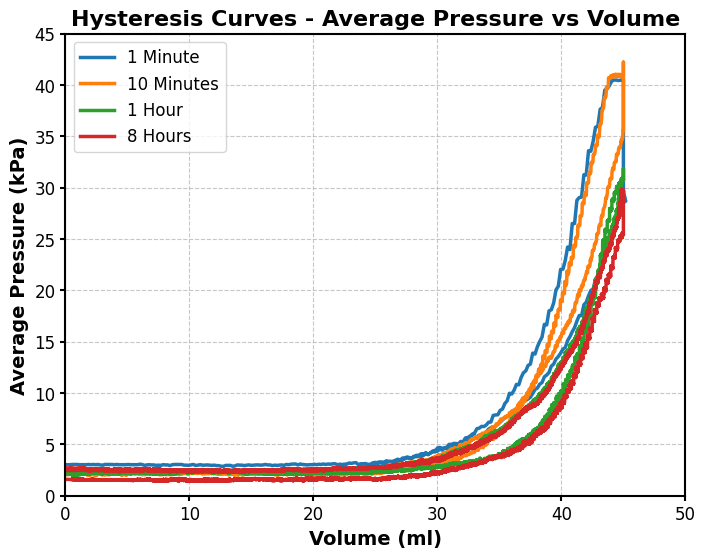

Graph saved as GraphedResults\HysteresisCurves_Tests.png


In [144]:
import matplotlib.pyplot as plt
import os

# Ensure the GraphedResults folder exists
output_folder = 'GraphedResults'
os.makedirs(output_folder, exist_ok=True)

def plot_volume_vs_pressure(filenames, labels):
    plt.figure(figsize=(8, 6))  # Set the figure size
    
    # Iterate over each file and plot data
    for filename, label in zip(filenames, labels):
        volumes = []
        avg_pressures = []
        
        # Read the file
        with open(filename, 'r') as file:
            lines = file.readlines()
            for line in lines:
                data = line.strip().split(', ')
                
                # Extract volume (last column) and average pressure (2nd column)
                time, avg_pressure, value3, volume = data
                avg_pressures.append(float(avg_pressure))
                volumes.append(float(volume.strip('%')))

        # Plot data for the current file with custom line styles
        plt.plot(volumes, avg_pressures, label=label, 
                 linewidth=2.5)  # Solid line with custom width

    # Set axis labels with the appropriate font and style
    plt.xlabel('Volume (ml)', fontsize=14, fontweight='bold')  # Bold x-axis label
    plt.ylabel('Average Pressure (kPa)', fontsize=14, fontweight='bold')  # Bold y-axis label

    # Add a title with bold text
    plt.title('Hysteresis Curves - Average Pressure vs Volume', fontsize=16, fontweight='bold')

    # Set the legend with appropriate location and font size
    plt.legend(loc='upper left', fontsize=12)

    # Customize the grid and axis ticks
    plt.grid(True, linestyle='--', alpha=0.7)  # Dotted grid with transparency
    plt.xticks(fontsize=12)  # Adjust the font size of x-axis ticks
    plt.yticks(fontsize=12)  # Adjust the font size of y-axis ticks

    # Set axis limits (optional)
    plt.xlim([0, 50])  # Set x-axis limits based on your data
    plt.ylim([0, 45])  # Customize based on your data

    # Set axis line width and tick width for a bolder look
    ax = plt.gca()
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.tick_params(width=1.5)

    # Save the plot as a PNG file
    file_name = 'HysteresisCurves_Tests.png'
    output_path = os.path.join(output_folder, file_name)
    plt.savefig(output_path)

    # Show the plot
    plt.show()

    print(f"Graph saved as {output_path}")

# List of files and corresponding labels
filenames = [
    'hysetersisupdate_2024_08_30 1min old sensor test1.txt',
    'hysetersisupdate_2024_08_30 10min old sensor test1.txt',
    'hysetersisupdate_2024-09-04_1hr_oldsensor_test1.txt',
    'hysetersisupdate_2024-09-06_8hr_oldsensor_test1.txt'
]
labels = ['1 Minute', '10 Minutes', '1 Hour', '8 Hours']

# Plot the graphs
plot_volume_vs_pressure(filenames, labels)

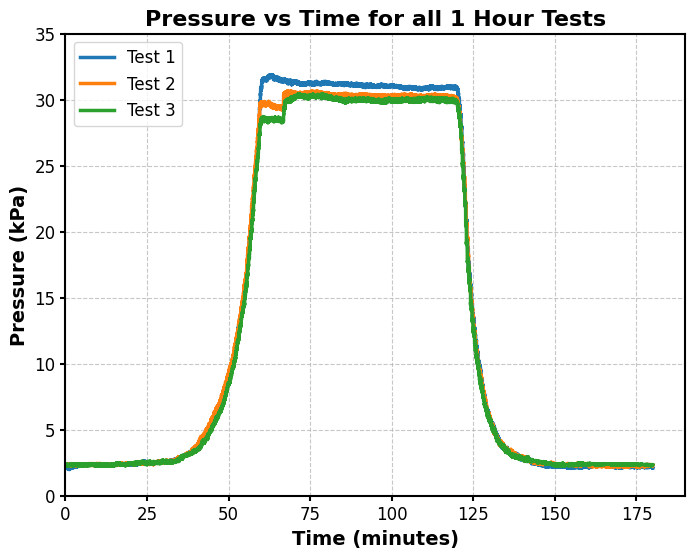

Graph saved as GraphedResults\Pressure_vs_Time_1hour_AllTests.png


In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure the GraphedResults folder exists
output_folder = 'GraphedResults'
os.makedirs(output_folder, exist_ok=True)

def plot_multiple_files(filenames, labels):
    # Create the plot with the specified figure size
    plt.figure(figsize=(8, 6))

    # Iterate over each file and plot its data
    for filename, label in zip(filenames, labels):
        # Load the TXT file with comma-separated values
        txt_data = pd.read_csv(filename, sep=',', header=0, names=['Time', 'Pressure', 'Max'])
        
        # Plot the data with custom line styles
        plt.plot(txt_data['Time'], txt_data['Pressure'], label=label, linewidth=2.5)

    # Set axis labels with the appropriate font and style
    plt.xlabel('Time (minutes)', fontsize=14, fontweight='bold')  # Bold x-axis label
    plt.ylabel('Pressure (kPa)', fontsize=14, fontweight='bold')  # Bold y-axis label

    # Add a title with bold text
    plt.title('Pressure vs Time for all 1 Hour Tests', fontsize=16, fontweight='bold')

    # Set the legend with appropriate location and font size
    plt.legend(loc='upper left', fontsize=12)

    # Customize the grid and axis ticks
    plt.grid(True, linestyle='--', alpha=0.7)  # Dotted grid
    plt.xticks(fontsize=12)  # Adjust the font size of x-axis ticks
    plt.yticks(fontsize=12)  # Adjust the font size of y-axis ticks

    # Set axis limits (optional, based on your data)
    plt.xlim([0, 190])  # Example: setting x-axis limits
    plt.ylim([0, 35])   # Example: setting y-axis limits

    # Set axis line width and tick width for a bolder look
    ax = plt.gca()
    ax.spines['top'].set_linewidth(1.5)
    ax.spines['right'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.tick_params(width=1.5)

    # Save the plot as a PNG file
    file_name = 'Pressure_vs_Time_1hour_AllTests.png'
    output_path = os.path.join(output_folder, file_name)
    plt.savefig(output_path)

    # Show the plot
    plt.show()

    print(f"Graph saved as {output_path}")

# List of files and corresponding labels
filenames = [
    'update_2024-09-04_1hr_oldsensor_test1.txt',
    'update_2024-09-05_1hr_oldsensor_test2.txt',
    'update_2024-09-05_1hr_oldsensor_test3.txt'
]
labels = ['Test 1', 'Test 2', 'Test 3']

# Plot the graphs
plot_multiple_files(filenames, labels)